In [33]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy import stats
from scipy.optimize import curve_fit
import pandas as pd
from distfit import distfit
from scipy.stats import skewnorm
from scipy.stats import norm
from scipy.stats import lognorm

In [34]:
# import list of best-performing flares
filename = '/Users/coletamburri/Desktop/Impulsiveness_Paper/imp_dev/all_and_best_Jan_2024_alt.mat'
dat = sio.loadmat(filename)

In [35]:
plt.rcParams['text.usetex']=True
plt.rcParams['font.family']='sans-serif'
plt.rcParams['font.sans-serif'] = ['Tahoma']

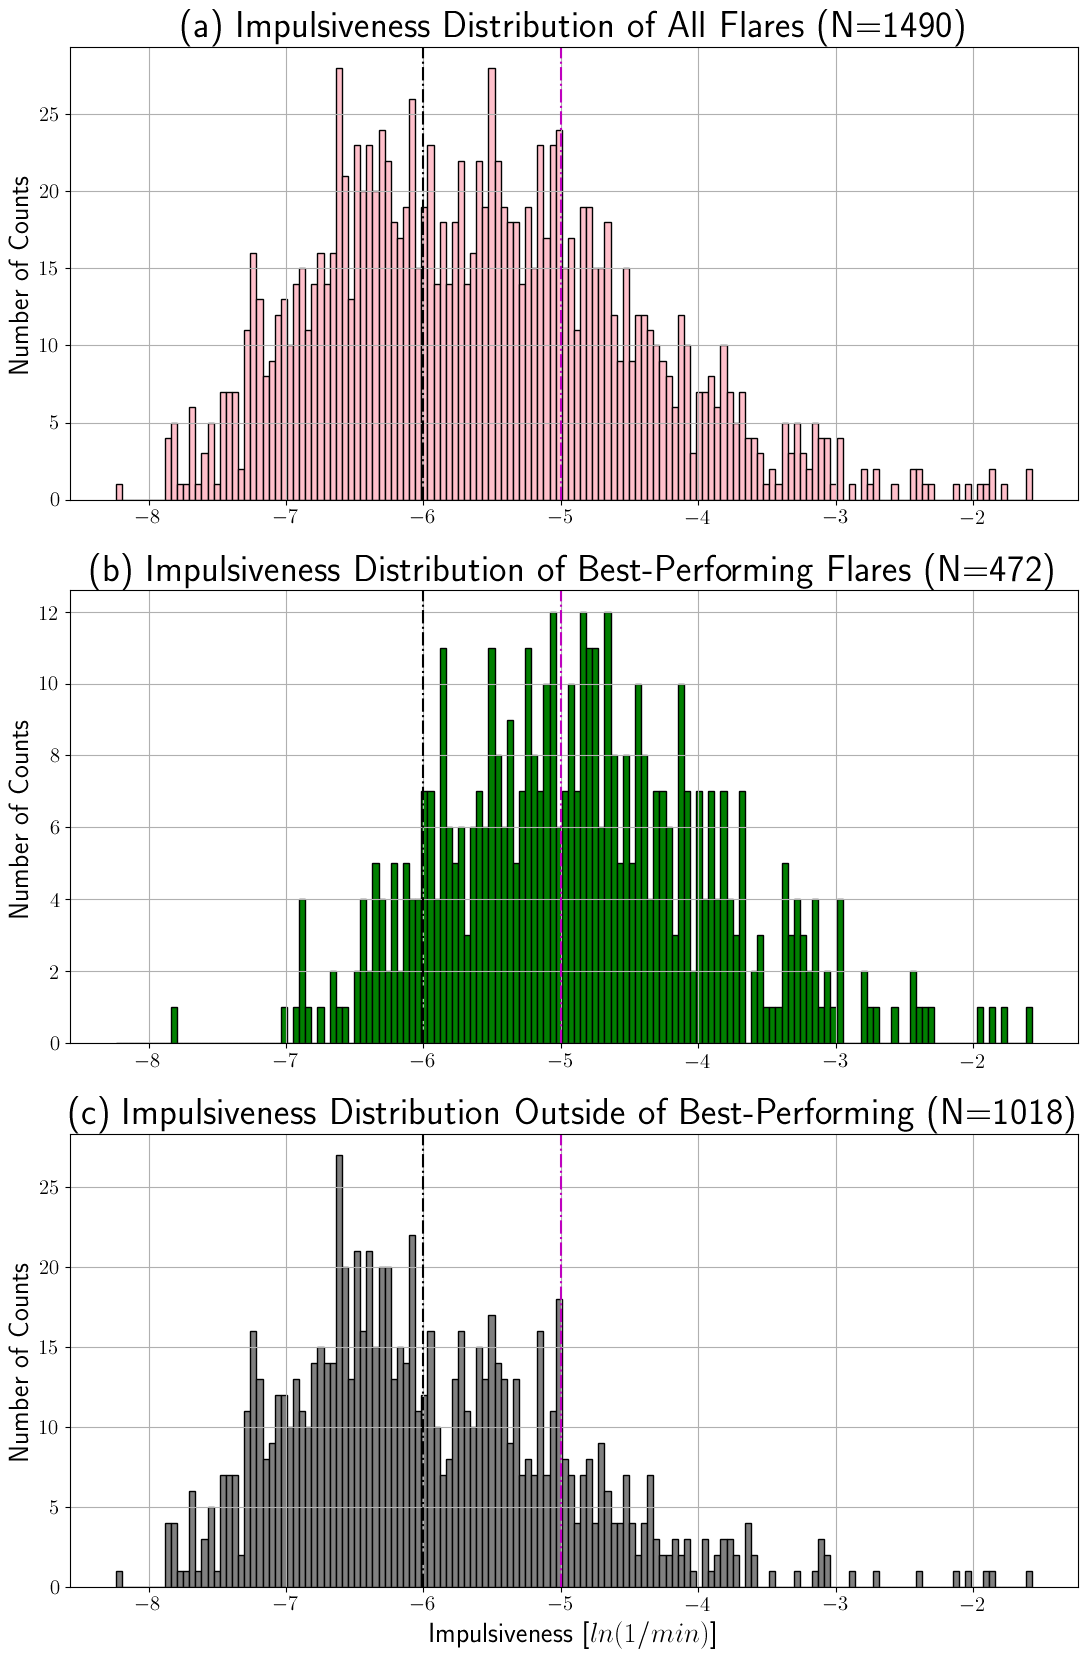

In [36]:
# run ks test for smaller bin sizes - say, 151 - to develop models first
import scipy.stats
all_imp = dat['curly_Is_relative']
best_imp_arr = dat['curly_Is_relative_best']
best_imp = best_imp_arr[:,0]

all_imp_df = pd.DataFrame(all_imp,columns = ['All_Imp','All_Imp_Inds'])
best_imp_df = pd.DataFrame(best_imp_arr, columns = ['Best_Imp','Best_Imp_Inds'])

all_imp_cp = all_imp[:,0].copy()
j=0
for i in best_imp_arr[:,1]:
    idx = int(i)-1
    all_imp_cp[idx] = best_imp[j]
    j = j+1
    
all_imp_prep = all_imp_cp.copy()

for i in best_imp_df['Best_Imp_Inds'].values:
    ind = int(i)
    all_imp_prep[ind-1]=0.0
    
best_imp_nonan =[]

for i in best_imp_df[best_imp_df['Best_Imp'].notnull()]['Best_Imp']:
    best_imp_nonan.append(i)
    
all_imp_nonan = all_imp_cp.copy()

for i in best_imp_df[best_imp_df['Best_Imp'].isnull()]['Best_Imp_Inds'].values:
    ind = int(i)
    all_imp_nonan[ind-1]=0.0

all_imp_prep_cp = all_imp_prep.copy()
all_imp_nonan_cp = all_imp_nonan.copy()

not_best_imp_nonan = all_imp_prep_cp[all_imp_prep_cp < 0.0]
all_imp_nonan = (all_imp_nonan_cp[all_imp_nonan_cp < 0.0])

edges = np.linspace(min(all_imp_nonan),max(all_imp_nonan),num=151)

fig,[ax1,ax2,ax3] = plt.subplots(3,1,figsize = [13,20])

f = ax2.hist(best_imp_nonan,bins=edges,facecolor='green',edgecolor='black')
g = ax3.hist(not_best_imp_nonan,bins=edges,facecolor='gray',edgecolor='black')
h = ax1.hist(all_imp_nonan,bins=edges,facecolor='pink',edgecolor='black')

ax2.grid()
ax3.grid()
ax1.grid()
ax3.set_xlabel('Impulsiveness [$ln(1/min)$]',fontsize=20)
ax2.set_ylabel('Number of Counts',fontsize=20)
ax3.set_ylabel('Number of Counts',fontsize=20)
ax1.set_ylabel('Number of Counts',fontsize=20)
ax2.set_title('(b) Impulsiveness Distribution of Best-Performing Flares (N=472)',font='Tahoma',fontsize=27,fontweight='bold')
ax3.set_title('(c) Impulsiveness Distribution Outside of Best-Performing (N=1018)',font='Tahoma',fontsize=27,fontweight='bold')
ax1.set_title('(a) Impulsiveness Distribution of All Flares (N=1490)',font='Tahoma',fontsize=27,fontweight='bold')
ax2.tick_params(axis='both', which='major', labelsize=15)
ax3.tick_params(axis='both', which='major', labelsize=15)
ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.axvline(-6,c='k',ls='dashdot')
ax1.axvline(-5,c='m',ls='dashdot')
ax2.axvline(-6,c='k',ls='dashdot')
ax2.axvline(-5,c='m',ls='dashdot')
ax3.axvline(-6,c='k',ls='dashdot')
ax3.axvline(-5,c='m',ls='dashdot')

In [37]:
# lognorm models - best fit after new selection of events

['shape = ', 0.2, ' loc = ', -11.21, ' scale = ', 5.52]


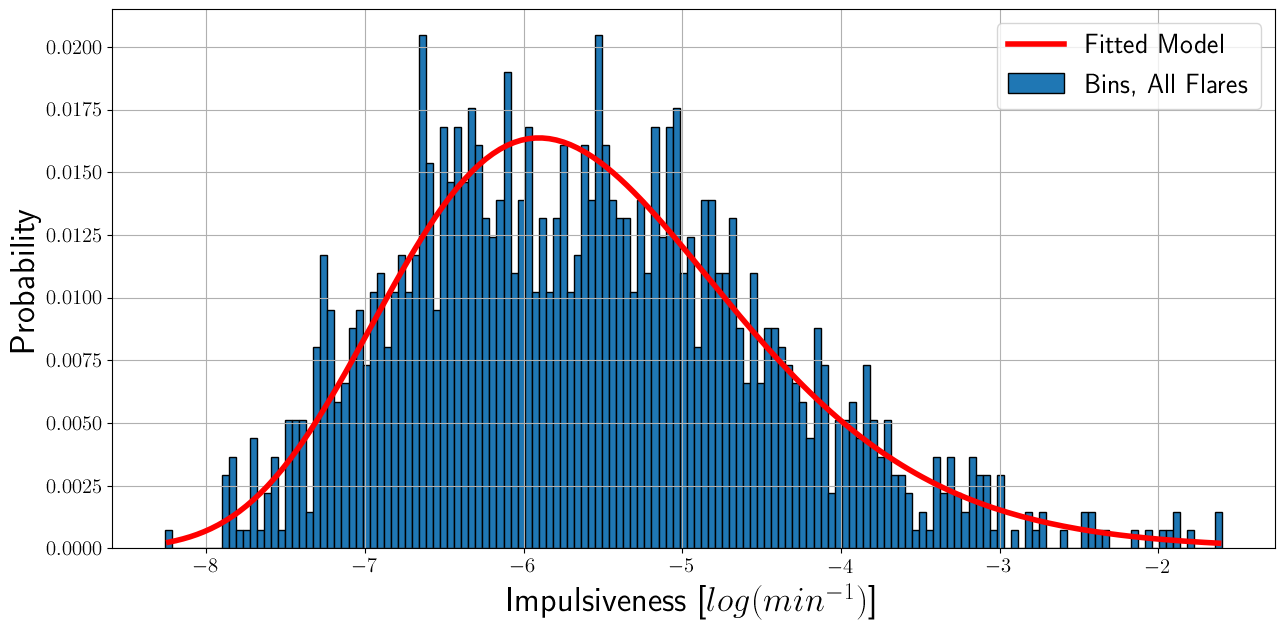

In [38]:
hist = np.histogram(all_imp_nonan,bins=edges)
hist_dist = scipy.stats.rv_histogram(hist)

data = all_imp_nonan
shape, loc, scale= stats.lognorm.fit(data)
print(['shape = ',round(shape,2),' loc = ',round(loc,2),' scale = ',round(scale,2)])
lognorm = stats.lognorm.pdf(edges[0:-1],shape,loc,scale)
fig,ax = plt.subplots(figsize=(15,7))
ax.bar(edges[0:-1],h[0]/sum(h[0]),label='Bins, All Flares',width=(edges[1]-edges[0]),edgecolor='black')
ax.plot(edges[0:-1],(lognorm/np.nansum(lognorm)),label='Fitted Model',color='red',linewidth=4)
ax.legend(fontsize=20)
ax.grid()
ax.set_ylabel('Probability',fontsize=25)
ax.set_xlabel('Impulsiveness [$log(min^{-1})$]',fontsize=25)
ax.tick_params(labelsize=15)
           

['shape = ', 0.11, ' loc = ', -13.57, ' scale = ', 8.66]


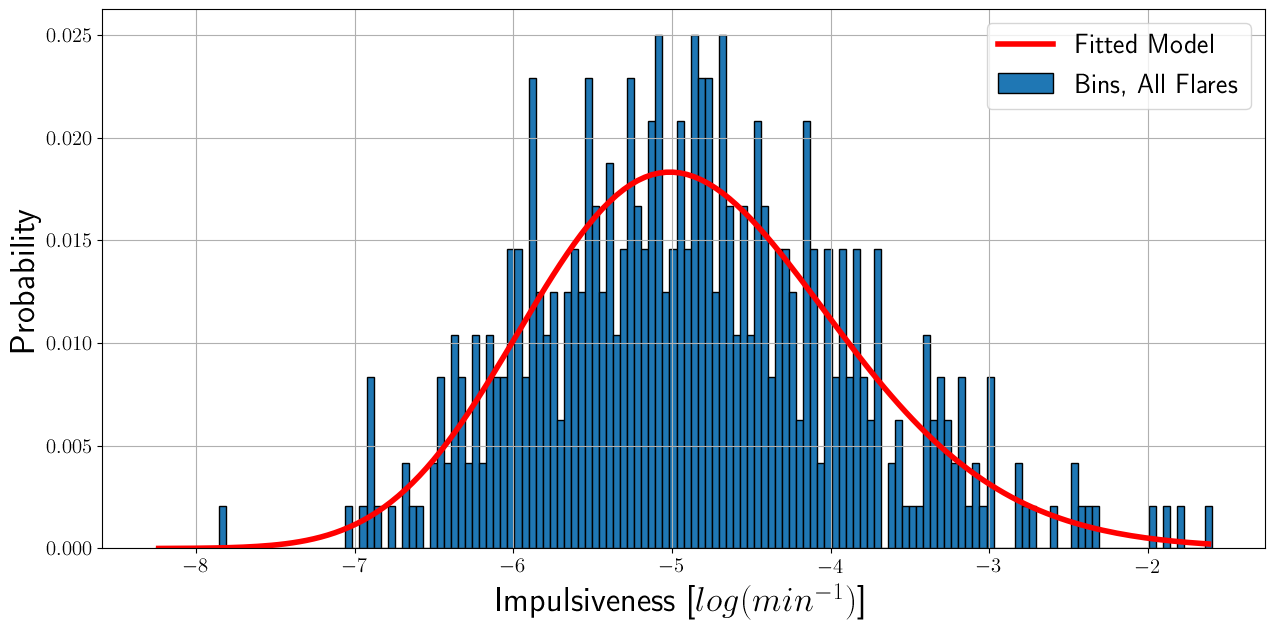

In [39]:
hist = np.histogram(best_imp_nonan,bins=edges)
hist_dist = scipy.stats.rv_histogram(hist)

data = best_imp_nonan
shape2, loc2, scale2= stats.lognorm.fit(data)
print(['shape = ',round(shape2,2),' loc = ',round(loc2,2),' scale = ',round(scale2,2)])
lognorm2 = stats.lognorm.pdf(edges[0:-1],shape2,loc2,scale2)
fig,ax = plt.subplots(figsize=(15,7))
ax.bar(edges[0:-1],f[0]/sum(f[0]),label='Bins, All Flares',width=(edges[1]-edges[0]),edgecolor='black')
ax.plot(edges[0:-1],(lognorm2/np.nansum(lognorm2)),label='Fitted Model',color='red',linewidth=4)
ax.legend(fontsize=20)
ax.grid()
ax.set_ylabel('Probability',fontsize=25)
ax.set_xlabel('Impulsiveness [$log(min^{-1})$]',fontsize=25)
ax.tick_params(labelsize=15)

['skewness = ', 0.27, ' center = ', -9.65, ' scale = ', 3.55]


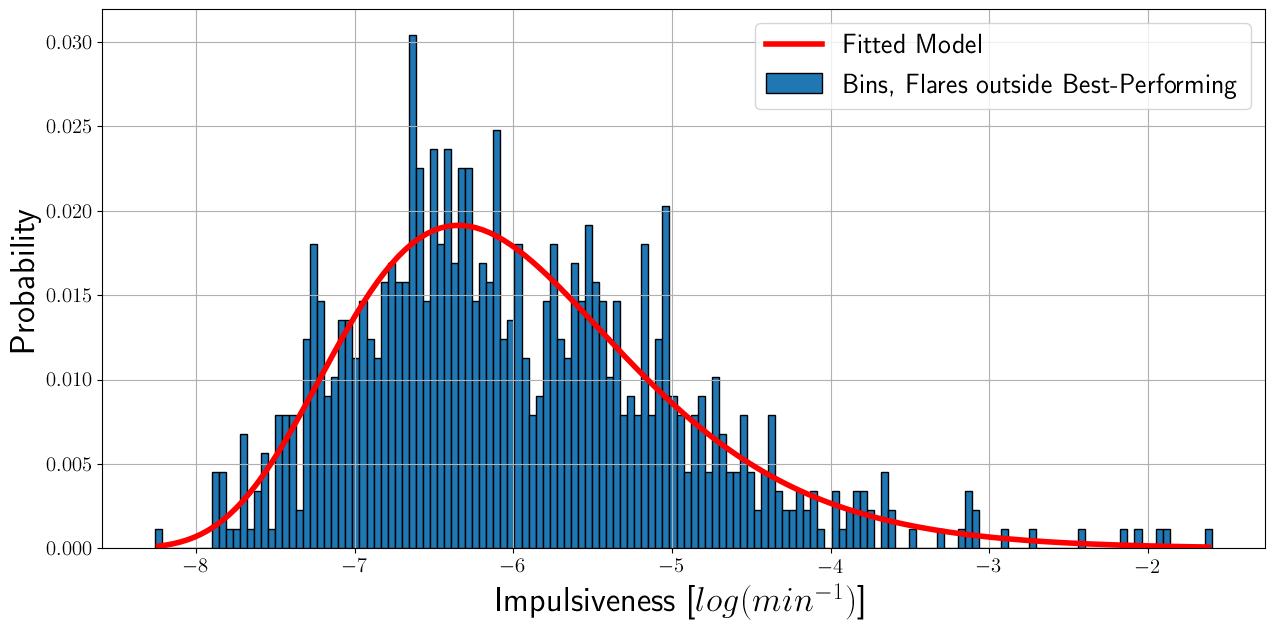

In [40]:
# for not best flares

data3 = not_best_imp_nonan
shape3, loc3, scale3 = stats.lognorm.fit(data3)

print(['skewness = ',round(shape3,2),' center = ',round(loc3,2),' scale = ',round(scale3,2)])
lognorm3 = stats.lognorm.pdf(edges[0:-1],shape3,loc3,scale3)
fig,ax = plt.subplots(figsize=(15,7))
ax.bar(edges[0:-1],g[0]/sum(g[0]),label='Bins, Flares outside Best-Performing',width=(edges[1]-edges[0]),edgecolor='black')
ax.plot(edges[0:-1],(lognorm3/sum(lognorm3)),label='Fitted Model',color='red',linewidth=4)
ax.legend(fontsize=20)
ax.grid()
ax.set_ylabel('Probability',fontsize=25)
ax.set_xlabel('Impulsiveness [$log(min^{-1})$]',fontsize=25)
ax.tick_params(labelsize=15)

In [41]:
# skewnorm models - pre-Sep 2023 edit, before change in selected based on ref reports

['skewness = ', 2.6, ' center = ', -6.86, ' scale = ', 1.71]


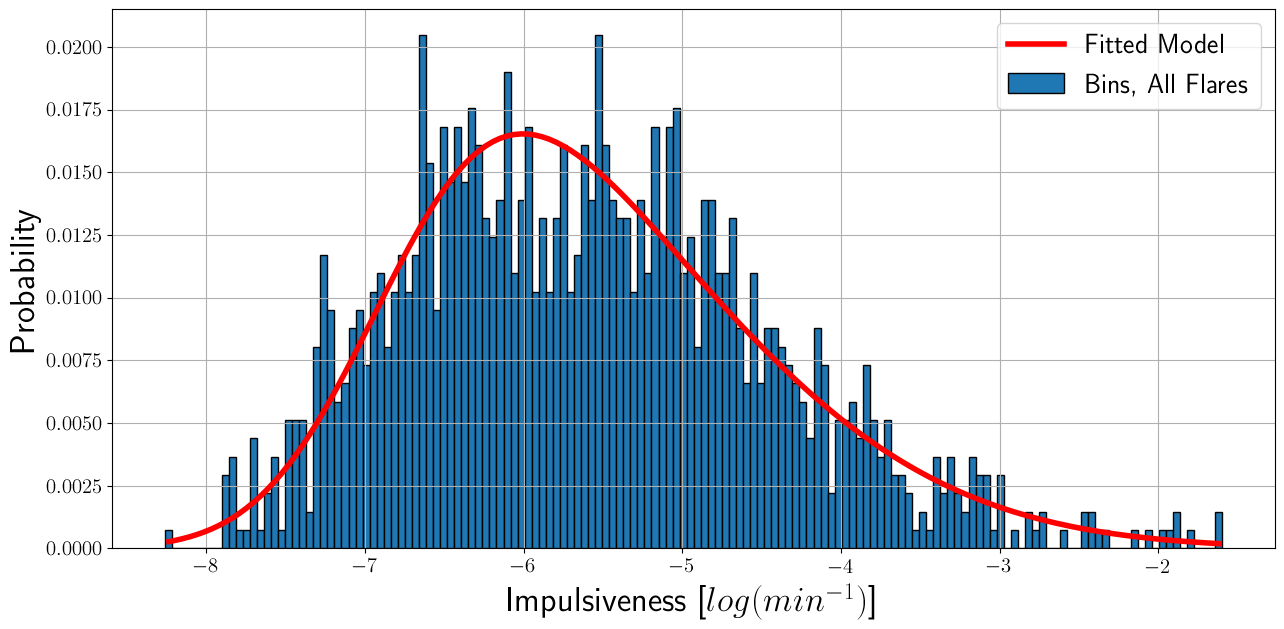

In [42]:
hist = np.histogram(all_imp_nonan,bins=edges)
hist_dist = scipy.stats.rv_histogram(hist)

# for all flares
a, loc, scale = 1.0, -6, 1
data = all_imp_nonan
a_estimate, loc_estimate, scale_estimate = stats.skewnorm.fit(data)
print(['skewness = ',round(a_estimate,2),' center = ',round(loc_estimate,2),' scale = ',round(scale_estimate,2)])
skewedgauss = 2*norm.pdf((edges[0:-1]-loc_estimate)/scale_estimate)*norm.cdf(a_estimate*((edges[0:-1]-loc_estimate)/scale_estimate))
fig,ax = plt.subplots(figsize=(15,7))
ax.bar(edges[0:-1],h[0]/sum(h[0]),label='Bins, All Flares',width=(edges[1]-edges[0]),edgecolor='black')
ax.plot(edges[0:-1],(skewedgauss/sum(skewedgauss)),label='Fitted Model',color='red',linewidth=4)
ax.legend(fontsize=20)
ax.grid()
ax.set_ylabel('Probability',fontsize=25)
ax.set_xlabel('Impulsiveness [$log(min^{-1})$]',fontsize=25)
ax.tick_params(labelsize=15)
           

['skewness = ', 1.66, ' center = ', -5.77, ' scale = ', 1.35]


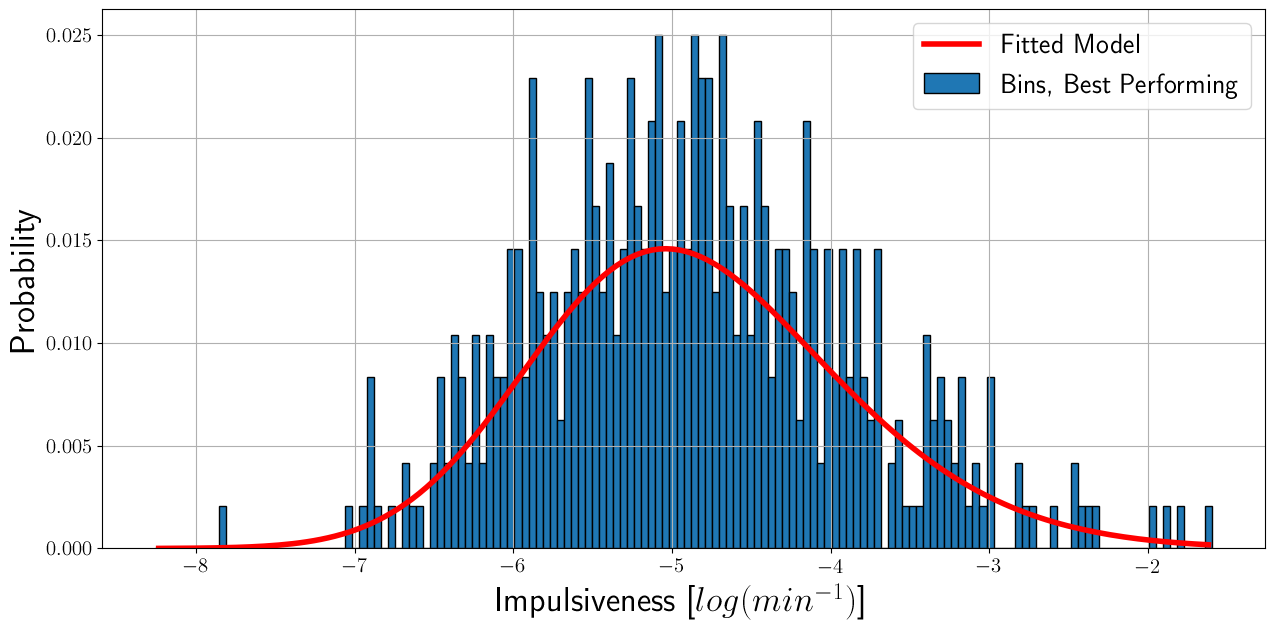

In [43]:
# for best flares
a2, loc2, scale2 = 1.0, -6, 1
data2 = best_imp_nonan
a_estimate2, loc_estimate2, scale_estimate2 = stats.skewnorm.fit(data2)

print(['skewness = ',round(a_estimate2,2),' center = ',round(loc_estimate2,2),' scale = ',round(scale_estimate2,2)])
skewedgauss2 = 2*norm.pdf((edges[0:-1]-loc_estimate2)/scale_estimate2)*norm.cdf(a_estimate2*((edges[0:-1]-loc_estimate2)/scale_estimate2))
fig,ax = plt.subplots(figsize=(15,7))
ax.bar(edges[0:-1],f[0]/sum(np.array(f[0])),label='Bins, Best Performing',width=(edges[1]-edges[0]),edgecolor='black')
ax.plot(edges[0:-1],(skewedgauss2/sum(skewedgauss)),label='Fitted Model',color='red',linewidth=4)
ax.legend(fontsize=20)
ax.grid()
ax.set_ylabel('Probability',fontsize=25)
ax.set_xlabel('Impulsiveness [$log(min^{-1})$]',fontsize=25)
ax.tick_params(labelsize=15)

['skewness = ', 3.42, ' center = ', -7.17, ' scale = ', 1.57]


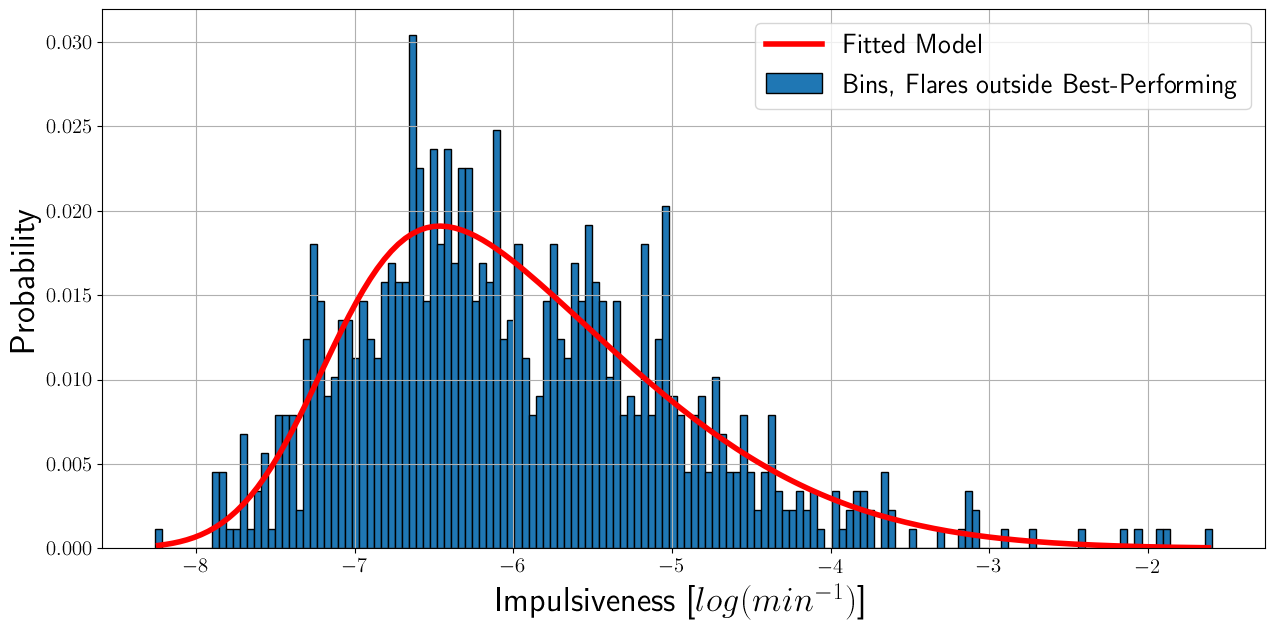

In [44]:
# for not best flares
a3, loc3, scale3 = 1.0, -6, 1
data3 = not_best_imp_nonan
a_estimate3, loc_estimate3, scale_estimate3 = stats.skewnorm.fit(data3)

print(['skewness = ',round(a_estimate3,2),' center = ',round(loc_estimate3,2),' scale = ',round(scale_estimate3,2)])
skewedgauss3 = 2*norm.pdf((edges[0:-1]-loc_estimate3)/scale_estimate3)*norm.cdf(a_estimate3*((edges[0:-1]-loc_estimate3)/scale_estimate3))
fig,ax = plt.subplots(figsize=(15,7))
ax.bar(edges[0:-1],g[0]/sum(g[0]),label='Bins, Flares outside Best-Performing',width=(edges[1]-edges[0]),edgecolor='black')
ax.plot(edges[0:-1],(skewedgauss3/sum(skewedgauss3)),label='Fitted Model',color='red',linewidth=4)
ax.legend(fontsize=20)
ax.grid()
ax.set_ylabel('Probability',fontsize=25)
ax.set_xlabel('Impulsiveness [$log(min^{-1})$]',fontsize=25)
ax.tick_params(labelsize=15)

In [45]:
#create pandas dataframes containing best flares and all flares

all_imp = dat['curly_Is_relative']
best_imp_arr = dat['curly_Is_relative_best']
best_imp = best_imp_arr[:,0]

all_imp_df = pd.DataFrame(all_imp,columns = ['All_Imp','All_Imp_Inds'])
best_imp_df = pd.DataFrame(best_imp_arr, columns = ['Best_Imp','Best_Imp_Inds'])

In [46]:
#count number of flares in entire sample
l=0
for i in range(2049):
    if np.isnan(all_imp[i,0])==False:
        l+=1

In [47]:
# test - replace elements corresponding to best_flares array in all_flares array
all_imp_cp = all_imp[:,0].copy()
j=0
for i in best_imp_arr[:,1]:
    idx = int(i)-1
    all_imp_cp[idx] = best_imp[j]
    j = j+1
    
all_imp_prep = all_imp_cp.copy()

for i in best_imp_df['Best_Imp_Inds'].values:
    ind = int(i)
    all_imp_prep[ind-1]=0.0
    
best_imp_nonan =[]

for i in best_imp_df[best_imp_df['Best_Imp'].notnull()]['Best_Imp']:
    best_imp_nonan.append(i)
    
all_imp_nonan = all_imp_cp.copy()

for i in best_imp_df[best_imp_df['Best_Imp'].isnull()]['Best_Imp_Inds'].values:
    ind = int(i)
    all_imp_nonan[ind-1]=0.0

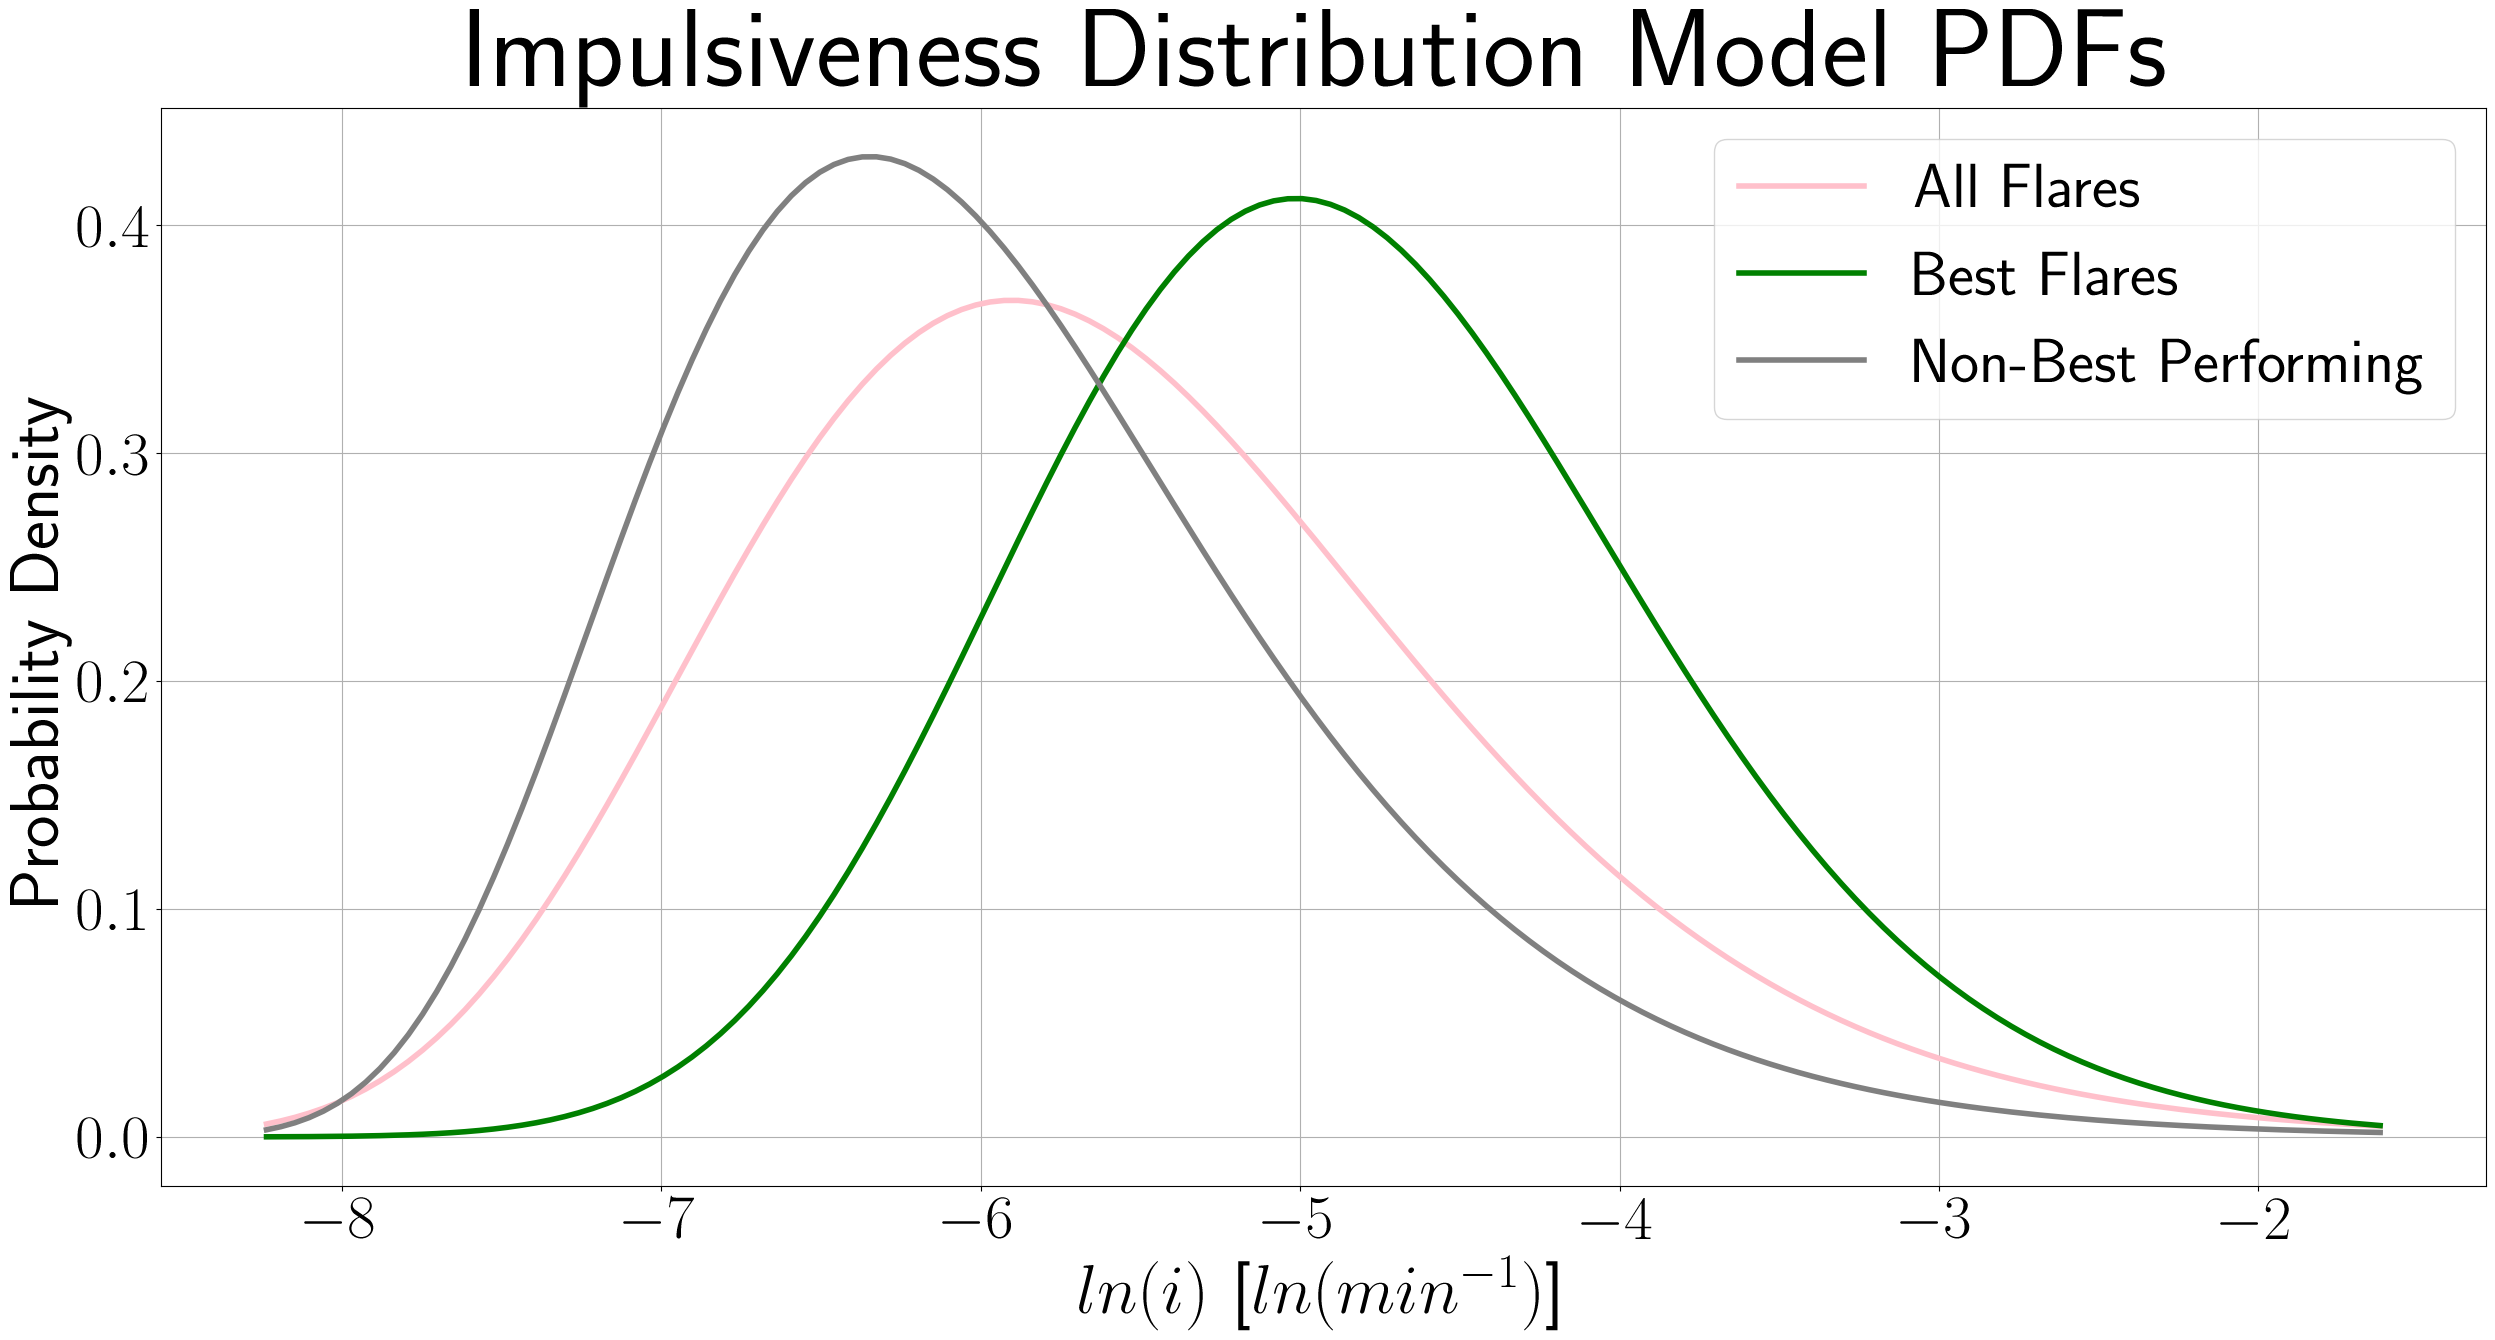

In [48]:
fig,ax = plt.subplots(figsize=(30,14))

ax.plot(edges[0:-1],(lognorm),label='All Flares',color='pink',linewidth=4)
ax.plot(edges[0:-1],(lognorm2),label='Best Flares',color='green',linewidth=4)
ax.plot(edges[0:-1],(lognorm3),label='Non-Best Performing',color='grey',linewidth=4)
ax.legend(fontsize=45)
ax.set_xlabel(r'$ln(i)$ [$ln(min^{-1})$]',fontsize=50)
ax.set_ylabel('Probability Density',fontsize=50)
ax.set_title('Impulsiveness Distribution Model PDFs',fontsize=80)
ax.tick_params(labelsize=45)
ax.grid()

In [49]:
#here is where I show the results of the fitting between various possible models

exset = ['lognorm','powernorm','t','norm','dweibull','gausshyper','skewnorm']

dist1 = distfit(distr=exset)
all_distfit = dist1.fit_transform(all_imp_nonan)
dist2 = distfit(distr=exset)
best_distfit = dist2.fit_transform(np.array(best_imp_nonan))
dist3 = distfit(distr=exset)
notbest_distfit = dist3.fit_transform(not_best_imp_nonan)

[distfit] >INFO> fit
[distfit] >INFO> transform


ValueError: autodetected range of [nan, nan] is not finite

In [50]:
dist1.plot()
dist1.plot_summary(figsize=(5,5))
dist2.plot()
dist2.plot_summary(figsize=(5,5))
dist3.plot()
dist3.plot_summary(figsize=(5,5))

Exception: [distfit] Error in plot: For plotting, A model is required. Try fitting first on your data using fit_transform(X)

In [51]:
#test to make sure of differences between arrays
add=0
for i in range(len(all_imp_cp)):
    if all_imp_cp[i] != all_imp[i,0] and (all_imp_cp[i]>0 or all_imp[i,0]>0):
        print(i)
        print(all_imp_cp[i])
        print(all_imp[i])
        add+=1
print(add)

0


In [52]:
#separate best flares from flares not in best performing
all_imp_prep_cp = all_imp_prep.copy()
all_imp_nonan_cp = all_imp_nonan.copy()

not_best_imp_nonan = all_imp_prep_cp[all_imp_prep_cp < 0.0]
all_imp_nonan = (all_imp_nonan_cp[all_imp_nonan_cp < 0.0])

edges = np.linspace(min(all_imp_nonan),max(all_imp_nonan),num=15)
edges2 = np.linspace(min(all_imp_nonan),max(all_imp_nonan),num=151)

In [53]:
# check numbers in best flares and not included in best-performing
len(best_imp_nonan)

480

In [54]:
len(not_best_imp_nonan)

888

In [55]:
# define function to be used later
def newscale(arr,newmax):
    minimum = np.min(arr)
    maximum = np.max(arr)
    newarr = np.zeros(len(arr))
    for i in range(len(arr)):
        newarr[i] = ((arr[i]-minimum)/(maximum-minimum))*newmax
    return newarr

In [56]:
len(not_best_imp_nonan)

888

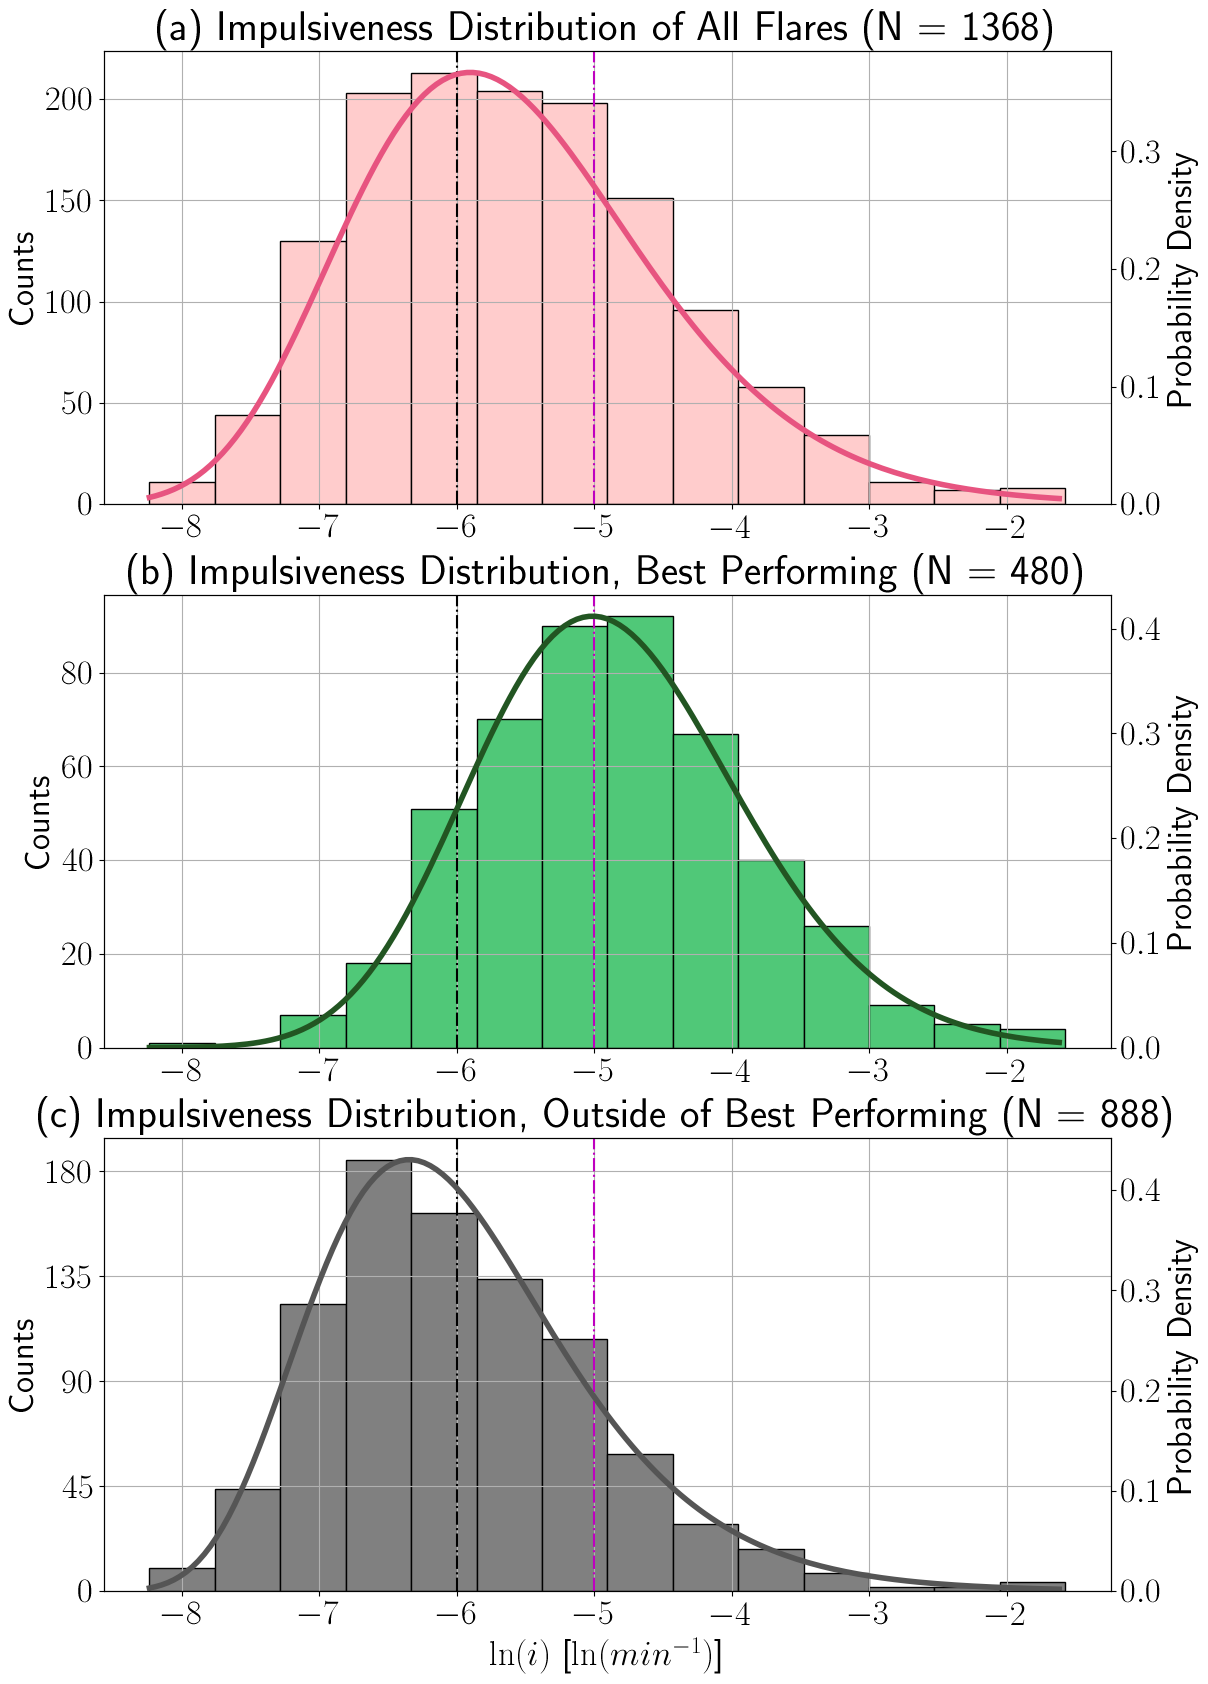

In [57]:
fig,[ax1,ax2,ax3] = plt.subplots(3,1,figsize = [13,20])
f = ax2.hist(best_imp_nonan,bins=edges,facecolor='#50C878',edgecolor='black')
g = ax3.hist(not_best_imp_nonan,bins=edges,facecolor='grey',edgecolor='black')
h = ax1.hist(all_imp_nonan,bins=edges,facecolor='#FFCCCC',edgecolor='black')
ax1_0 = ax1.twinx()
ax2_0 = ax2.twinx()
ax3_0 = ax3.twinx()

#ax1_0.plot(edges2[0:-1],newscale(skewedgauss,max(h[0])),label='All Flares',color='#e75480',linewidth=4)
#ax2_0.plot(edges2[0:-1],newscale(skewedgauss2,max(f[0])),label='Best Flares',color='#225522',linewidth=4)
#ax3_0.plot(edges2[0:-1],newscale(skewedgauss3,max(g[0])),label='Non-Best Performing',color='#555555',linewidth=4)
ax1_0.plot(edges2[0:-1],lognorm,label='All Flares',color='#e75480',linewidth=4)
ax2_0.plot(edges2[0:-1],lognorm2,label='Best Flares',color='#225522',linewidth=4)
ax3_0.plot(edges2[0:-1],lognorm3,label='Non-Best Performing',color='#555555',linewidth=4)
ax2.grid()
ax3.grid()
ax1.grid()


ax2.set_title('(b) Impulsiveness Distribution, Best Performing (N = 480)',font='Tahoma',fontsize=30,fontweight='bold')
ax3.set_title('(c) Impulsiveness Distribution, Outside of Best Performing (N = 888)',font='Tahoma',fontsize=30,fontweight='bold')
ax1.set_title('(a) Impulsiveness Distribution of All Flares (N = 1368)',font='Tahoma',fontsize=30,fontweight='bold')
ax2.tick_params(axis='both', which='major', labelsize=25)
ax3.tick_params(axis='both', which='major', labelsize=25)
ax1.tick_params(axis='both', which='major', labelsize=25)
ax2_0.tick_params(axis='both', which='major', labelsize=25)
ax3_0.tick_params(axis='both', which='major', labelsize=25)
ax1_0.tick_params(axis='both', which='major', labelsize=25)
# ax1_0.set_ylim([0,0.645])
# ax2_0.set_ylim([0,0.58])
# ax3_0.set_ylim([0,0.7])
ax1_0.set_ylim(bottom=0)
ax2_0.set_ylim(bottom=0)
ax3_0.set_ylim(bottom=0)
ax2.set_ylabel('Counts',fontsize=25)
ax3.set_ylabel('Counts',fontsize=25)
ax1.set_ylabel('Counts',fontsize=25)
ax2_0.set_ylabel('Probability Density',fontsize=25)
ax3_0.set_ylabel('Probability Density',fontsize=25)
ax1_0.set_ylabel('Probability Density',fontsize=25)
ax3.set_xlabel('$\ln(i)$ [$\ln(min^{-1})$]',fontsize=25)
ax1.axvline(-6,c='k',ls='dashdot')
ax1.axvline(-5,c='m',ls='dashdot')
ax2.axvline(-6,c='k',ls='dashdot')
ax2.axvline(-5,c='m',ls='dashdot')
ax3.axvline(-6,c='k',ls='dashdot')
ax3.axvline(-5,c='m',ls='dashdot')
ax3.set_yticks(np.linspace(0,180,5))


In [58]:
# students t test
stats.ttest_ind(best_imp_nonan,not_best_imp_nonan,alternative='greater')

TtestResult(statistic=19.596444923545782, pvalue=7.510470676245207e-76, df=1366.0)

In [59]:
# ks test comparison:

#first make pdfs
totalbest = 480
totalnotbest = 868

bestpdf = f[0]/totalbest
notbestpdf = g[0]/totalnotbest

#now cdfs
bestcdf = [bestpdf[0]]
notbestcdf = [notbestpdf[0]]

for i in range(len(bestpdf)-1):
    ind = int(i)
    bestcdf.append(bestcdf[i]+bestpdf[i+1])
    notbestcdf.append(notbestcdf[i]+notbestpdf[i+1])


In [60]:
sum(g[0])

888.0

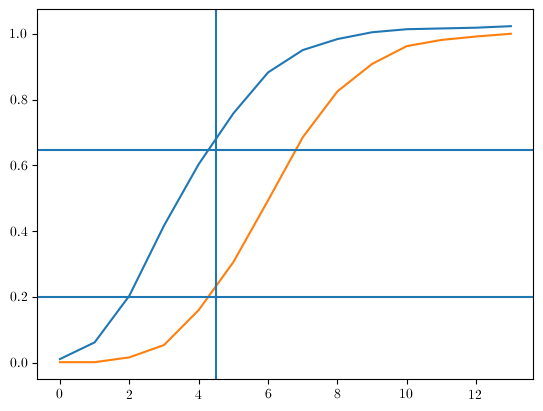

In [61]:
fig,ax= plt.subplots()
plt.plot(notbestcdf,'')
plt.plot(bestcdf)
plt.axhline(0.2)
plt.axhline(0.647)
plt.axvline(4.5)

In [62]:
result = stats.ks_2samp(best_imp_nonan,not_best_imp_nonan)
result

KstestResult(statistic=0.4410472972972973, pvalue=4.19795167838636e-55, statistic_location=-5.871350977090147, statistic_sign=-1)

# both hypothesis tests suggests they could be different samples.  Below is the old code, which I'm keeping for posterity (and in case there is a correction to be made in the future).  Code below this cell was NOT used in the Sep2023 submission of the paper.

### so, if we run the ks test on the two cdfs (so the ks test will essentially take the cdf of each cdf), the result is that they COULD be from the same distribution

In [210]:
# ks test comparison:

#first make pdfs
totalbest = 500
totalnotbest = 869

bestpdf = f[0]/totalbest
notbestpdf = g[0]/totalnotbest
allpdf =h[0]/(totalbest+totalnotbest)

#now cdfs
bestcdf = [bestpdf[0]]
notbestcdf = [notbestpdf[0]]
allcdf = [allpdf[0]]

for i in range(len(bestpdf)-1):
    ind = int(i)
    bestcdf.append(bestcdf[i]+bestpdf[i+1])
    notbestcdf.append(notbestcdf[i]+notbestpdf[i+1])
    allcdf.append(allcdf[i]+allpdf[i+1])

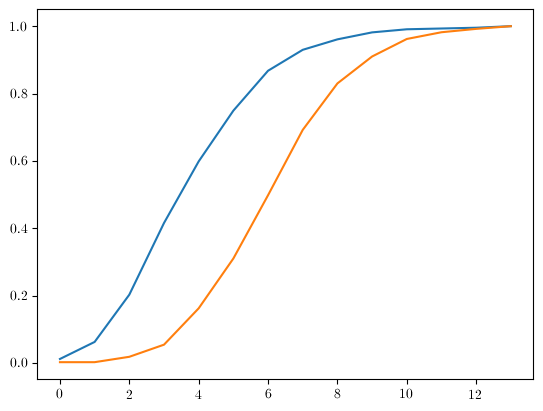

In [211]:
# cdf will obviously look pretty much the same, just higher resolution
fig,ax= plt.subplots()
plt.plot(notbestcdf)
plt.plot(bestcdf)

In [212]:
result2 = stats.ks_2samp(notbestcdf,bestcdf)
result2

KstestResult(statistic=0.21428571428571427, pvalue=0.9205155471799703)

## now the result is opposite.  Because higher resolution, smaller bins, we still have a significant number of occupants in each bin, but the result of the k-s test does not pass at the 5% significance level, suggesting that the two are from different populations

In [152]:
edges[1]

-8.192208249109633

In [156]:
#determination of pdf from cdf of all flares
cdf = allcdf
upperedges = edges[1:]

pdf = [(y2-y0)/(x2-x0) for x2, x0, y2, y0 in zip(upperedges[2:], upperedges, cdf[2:], cdf)]

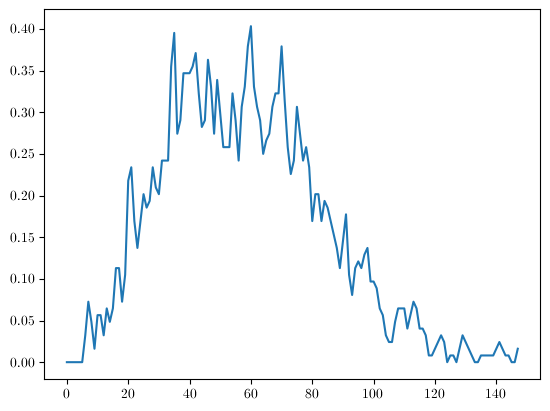

In [157]:
plt.plot(pdf)

In [160]:
skewedgauss

array([0.01051126, 0.01263949, 0.015127  , 0.0180191 , 0.0213638 ,
       0.02521147, 0.02961427, 0.03462555, 0.04029909, 0.04668821,
       0.05384478, 0.06181814, 0.07065393, 0.08039284, 0.0910694 ,
       0.10271062, 0.11533487, 0.12895064, 0.14355552, 0.15913528,
       0.17566318, 0.19309938, 0.21139078, 0.23047091, 0.25026031,
       0.27066705, 0.2915876 , 0.31290798, 0.33450515, 0.35624867,
       0.37800249, 0.39962695, 0.42098087, 0.44192365, 0.46231743,
       0.48202916, 0.50093253, 0.51890981, 0.53585344, 0.55166738,
       0.56626825, 0.5795861 , 0.59156497, 0.60216314, 0.61135301,
       0.61912087, 0.62546627, 0.63040125, 0.63394941, 0.63614478,
       0.63703061, 0.63665809, 0.63508501, 0.63237449, 0.6285937 ,
       0.62381258, 0.61810277, 0.61153657, 0.60418596, 0.59612186,
       0.58741341, 0.57812743, 0.56832798, 0.55807603, 0.54742922,
       0.53644176, 0.52516435, 0.51364419, 0.50192507, 0.49004748,
       0.47804872, 0.46596314, 0.45382225, 0.44165498, 0.42948

In [161]:
bestcdf_mod = [skewedgauss2[0]/sum(skewedgauss2)]
notbestcdf_mod = [skewedgauss3[0]/sum(skewedgauss3)]

for i in range(len(bestpdf)-1):
    ind = int(i)
    bestcdf_mod.append(bestcdf_mod[i]+skewedgauss2[i+1]/sum(skewedgauss2))
    notbestcdf_mod.append(notbestcdf_mod[i]+skewedgauss3[i+1]/sum(skewedgauss3))

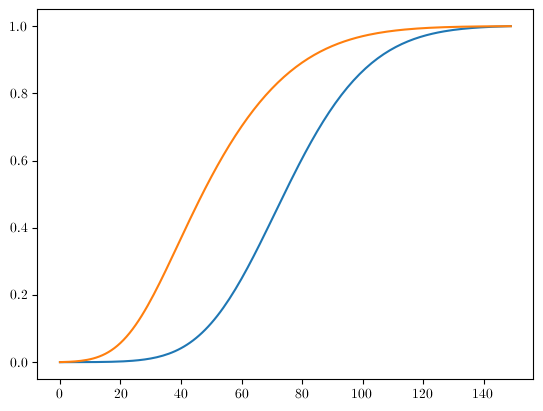

In [162]:
fig,ax = plt.subplots()
ax.plot(bestcdf_mod)
ax.plot(notbestcdf_mod)

In [163]:
# Use the high-cadence bins for the K-S test; use the models for difference in means?
result3 = stats.ks_2samp(notbestcdf_mod,bestcdf_mod)
result3

KstestResult(statistic=0.18666666666666668, pvalue=0.010603075080924049)

In [164]:
# Just barely above the 5% significance level, when comparing the models.  When comparing the means for the model:

In [31]:
stats.ttest_ind(skewedgauss2,skewedgauss3)

NameError: name 'skewedgauss2' is not defined

In [213]:
stats.ttest_ind(best_imp_nonan,not_best_imp_nonan)

Ttest_indResult(statistic=19.9153794773404, pvalue=1.0875819535090867e-77)

The two clearly do not have the same mean.  Let's use the model for the K-S test, and the data for the difference in means - and use 10% significance level for the K_S test (or undefined). So the t-test for difference in means suggests (with a very low p-value) that the two have difference means, very strongly, whereas the K-S test has a p-value slightly above the 5% significance level; however, it is known that the K-S test is conservative as far as hypothesis tests go (citation: https://journals.ametsoc.org/view/journals/mwre/135/3/mwr3326.1.xml)

In [167]:
# now the pdfs are continuous, so we can actually compare them (and, hopefully, show that they are not the same distribution...)